<a href="https://colab.research.google.com/github/BundeAmos/Time_Series/blob/main/Forecasting_Energy_Demand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>












Markdown

Python 3
Forecasting Energy Demand
#  Forecasting Energy Demand
Importing Necessary Libraries and Functions
The first thing we need to do is import the necessary functions and libraries that we will be working with throughout the topic. We should also go ahead and upload all the of the necessary data sets here instead of loading them as we go. We will be using energy production data from PJM Interconnection. They are a regional transmission organization that coordinates the movement of wholesale electricity in parts of the United States. Specifically, we will be focused on a region of Pennsylvania. We will also be using temperature data collected from the National Oceanic and Atmospheric Assocation (NOAA).

The first thing we need to do is import the necessary functions and libraries that we will be working with throughout the topic. We should also go ahead and upload all the of the necessary data sets here instead of loading them as we go. We will be using energy production data from PJM Interconnection. They are a regional transmission organization that coordinates the movement of wholesale electricity in parts of the United States. Specifically, we will be focused on a region of Pennsylvania. We will also be using temperature data collected from the National Oceanic and Atmospheric Assocation (NOAA).

## Objective

* Linear regression models are great initial models to build that predict a continuous variable (like energy usage). The typical linear regression modeling framework uses what we call ordinary least squares (OLS) to develop the model. For more information on OLS regression feel free to click on the help section below or look further in the resources!

* Build a linear regression model using the information you have learned from the previous sections with relationship to energy across time as well as energy’s relationship with temperature. Time to start building on what you have looked at in previous sections!

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Preparing the Energy and Temperature Data

In [32]:
# Loading the Needed Data Sets 
weather = pd.read_csv('/content/drive/MyDrive/Time Series/hr_temp_1_subset.csv')
energy = pd.read_csv('/content/drive/MyDrive/Time Series/hrl_load_metered.csv')



In [33]:
weather.head()

,STATION,DATE,REPORT_TYPE,SOURCE,HourlyDryBulbTemperature
0,72520514762,2017-02-01T00:53:00,FM-15,7,37.0
1,72520514762,2017-02-01T01:53:00,FM-15,7,37.0
2,72520514762,2017-02-01T02:53:00,FM-15,7,36.0
3,72520514762,2017-02-01T03:53:00,FM-15,7,36.0
4,72520514762,2017-02-01T04:53:00,FM-15,7,36.0


In [34]:
energy.head()

,datetime_beginning_utc,datetime_beginning_ept,nerc_region,mkt_region,zone,load_area,mw,is_verified
0,2/1/2017 5:00,2/1/2017 0:00,RFC,WEST,DUQ,DUQ,1419.881,True
1,2/1/2017 6:00,2/1/2017 1:00,RFC,WEST,DUQ,DUQ,1379.505,True
2,2/1/2017 7:00,2/1/2017 2:00,RFC,WEST,DUQ,DUQ,1366.106,True
3,2/1/2017 8:00,2/1/2017 3:00,RFC,WEST,DUQ,DUQ,1364.453,True
4,2/1/2017 9:00,2/1/2017 4:00,RFC,WEST,DUQ,DUQ,1391.265,True


In [35]:
data = {'MW': energy['mw'], 'Temp': weather['HourlyDryBulbTemperature'], 'Date': weather['DATE']}

In [36]:
df = pd.DataFrame(data)

In [37]:
print(df.dtypes)

MW      float64
Temp    float64
Date     object
dtype: object


In [38]:
df['Date'] = pd.to_datetime(df['Date'])
print(df.dtypes)

MW             float64
Temp           float64
Date    datetime64[ns]
dtype: object


In [39]:
df['hour'] = pd.DatetimeIndex(pd.to_datetime(df['Date'])).hour
df['day'] = pd.DatetimeIndex(pd.to_datetime(df['Date'])).day
df['weekday'] = df['Date'].dt.dayofweek
df['month'] = pd.DatetimeIndex(pd.to_datetime(df['Date'])).month
df['year'] = pd.DatetimeIndex(pd.to_datetime(df['Date'])).year

df.head()

,MW,Temp,Date,hour,day,weekday,month,year
0,1419.881,37.0,2017-02-01 00:53:00,0,1,2,2,2017
1,1379.505,37.0,2017-02-01 01:53:00,1,1,2,2,2017
2,1366.106,36.0,2017-02-01 02:53:00,2,1,2,2,2017
3,1364.453,36.0,2017-02-01 03:53:00,3,1,2,2,2017
4,1391.265,36.0,2017-02-01 04:53:00,4,1,2,2,2017


In [40]:
df =df.set_index('Date')

In [41]:
sum(df['Temp'].isnull())

37

In [42]:
df['Temp'] = df['Temp'].interpolate(method='linear')

In [43]:
sum(df['Temp'].isnull())

0

In [44]:
sum(df['MW'].isnull())

0

In [45]:
#Training and Validation Split #
train = pd.DataFrame(df['2017-01-01':'2019-12-31'])
test = pd.DataFrame(df['2020-01-01':'2020-01-31'])

In [46]:
train.head()

,MW,Temp,hour,day,weekday,month,year
Date,,,,,,,
2017-02-01 00:53:00,1419.881,37.0,0,1,2,2,2017
2017-02-01 01:53:00,1379.505,37.0,1,1,2,2,2017
2017-02-01 02:53:00,1366.106,36.0,2,1,2,2,2017
2017-02-01 03:53:00,1364.453,36.0,3,1,2,2,2017
2017-02-01 04:53:00,1391.265,36.0,4,1,2,2,2017


In [47]:
test.head()

,MW,Temp,hour,day,weekday,month,year
Date,,,,,,,
2020-01-01 00:53:00,1363.428,31.0,0,1,2,1,2020
2020-01-01 01:53:00,1335.975,29.0,1,1,2,1,2020
2020-01-01 02:53:00,1296.817,30.0,2,1,2,1,2020
2020-01-01 03:53:00,1288.403,30.0,3,1,2,1,2020
2020-01-01 04:53:00,1292.263,31.0,4,1,2,1,2020


 # Exploring / Visualizing Energy and Temperature Data 

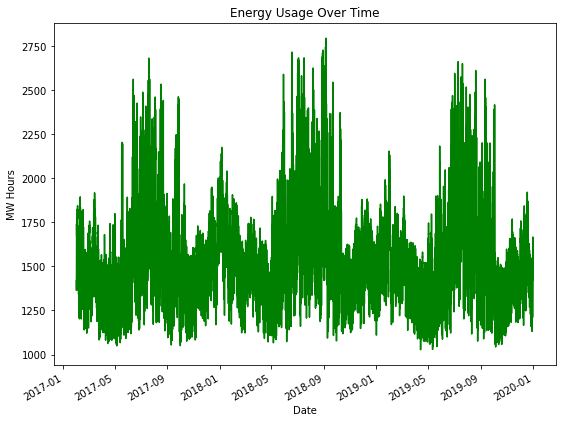

In [48]:
ax1 = train['MW'].plot(color = 'green', figsize=(9,7))

ax1.set_ylabel('MW Hours')
ax1.set_xlabel('Date')
ax1.set_title('Energy Usage Over Time')

plt.show()

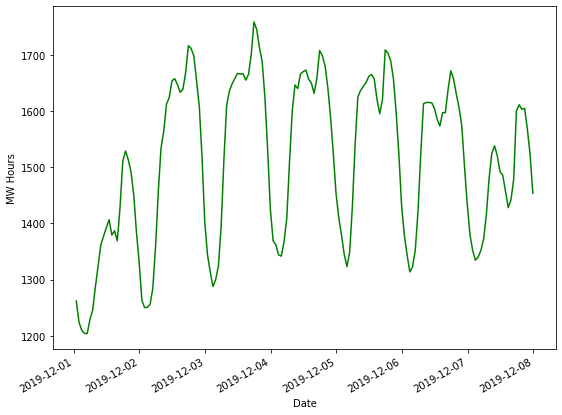

In [49]:
train_mw = train['MW']

ax1 = train_mw['2019-12-01':'2019-12-07'].plot(color = 'green', figsize=(9,7))

ax1.set_ylabel('MW Hours')
ax1.set_xlabel('Date')

plt.show()

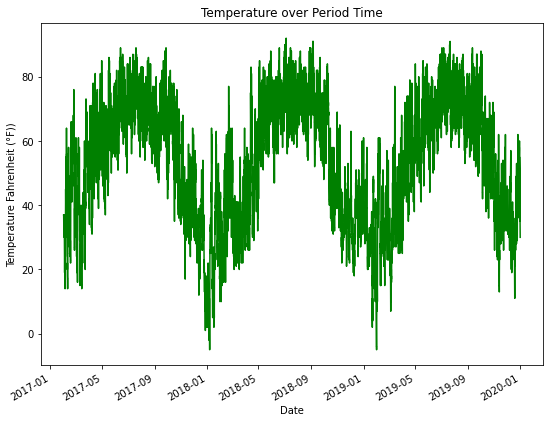

In [50]:
ax2 = train['Temp'].plot(color = 'green', figsize=(9,7))

ax2.set_ylabel('Temperature Fahrenheit (°F))')
ax2.set_xlabel('Date')
ax2.set_title('Temperature over Period Time')

plt.show()

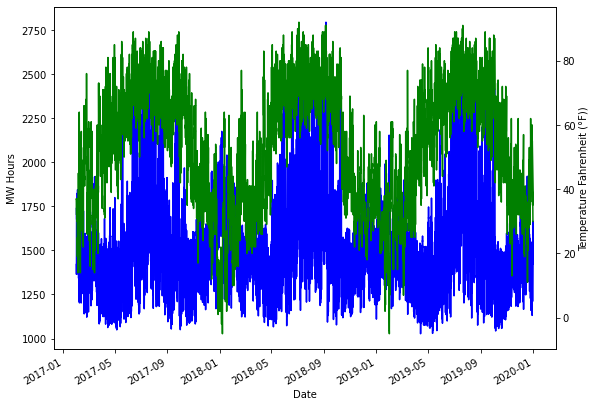

In [51]:
ax1 = train['MW'].plot(color = 'blue', figsize=(9,7))

ax1.set_ylabel('MW Hours')
ax1.set_xlabel('Date')

ax2 = ax1.twinx()

ax2 = train['Temp'].plot(color = 'green', figsize=(9,7))

ax2.set_ylabel('Temperature Fahrenheit (°F))')

plt.show()

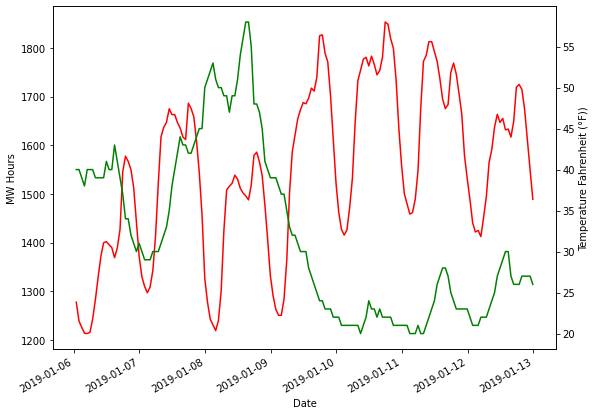

In [52]:
train_mw = train['MW']
train_t = train['Temp']

ax1 = train_mw['2019-01-06':'2019-01-12'].plot(color = 'red', figsize=(9,7))

ax1.set_ylabel('MW Hours')
ax1.set_xlabel('Date')

ax2 = ax1.twinx()

ax2 = train_t['2019-01-06':'2019-01-12'].plot(color = 'green', figsize=(9,7))

ax2.set_ylabel('Temperature Fahrenheit (°F))')

plt.show()

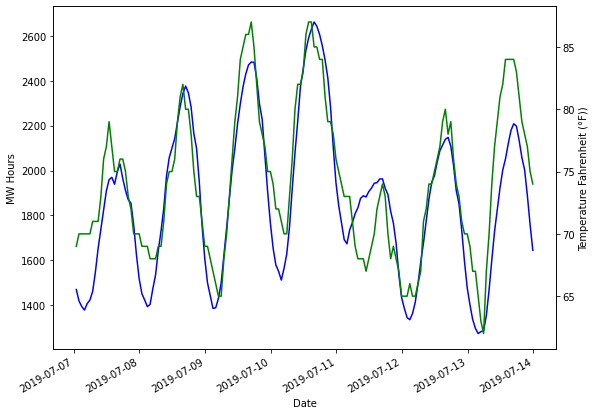

In [53]:
train_mw = train['MW']
train_t = train['Temp']

ax1 = train_mw['2019-07-07':'2019-07-13'].plot(color = 'blue', figsize=(9,7))

ax1.set_ylabel('MW Hours')
ax1.set_xlabel('Date')

ax2 = ax1.twinx()

ax2 = train_t['2019-07-07':'2019-07-13'].plot(color = 'green', figsize=(9,7))

ax2.set_ylabel('Temperature Fahrenheit (°F))')

plt.show()

In [54]:
correlation = train['Temp'].corr(train['MW'])
print("Correlation is: ", correlation)

Correlation is:  0.32753955690741204


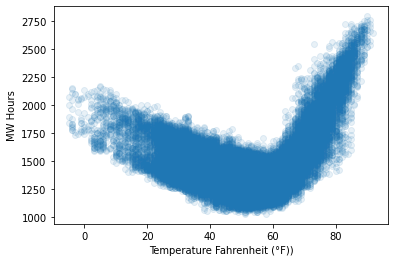

In [55]:
plt.scatter(train['Temp'], train['MW'], alpha = 0.1)
plt.xlabel('Temperature Fahrenheit (°F))')
plt.ylabel('MW Hours')
plt.show()

# Building Naive Energy Model


Now that we have recreated the pieces of milestone 1 that clean and split our data we can start the modeling phase of milestone 3.

First, let's review some of the findings we have from the first two milestones:
- Energy usage changes depending on month / season
- Energy usage changes depending on day of week
- Energy usage changes depending on hour of day
- Energy usage changes depending on outside temperature
- The relationship between temperature and energy usage appears quadratic in nature

Looking at this last bullet point, we need to create a quadratic variable on temperature as temperature in the model by itself won't be enough to model energy usage. It is always good practice to standardize (mean of 0 and standard deviation of 1) any variable you are going to raise to a higher power in a regression to help prevent multicollinearity problems. We can standardize the variable *Temp* by using the ```mean``` and ```std``` functions.